

---
# **Task 2 - Stock Market Prediction and Forecasting using Stacked LSTM**
---




---
# **Name : Kaviya Sri A.N**
---

## **Importing the Libraries**

In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
url = "https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv"
train_dataset = pd.read_csv(url)
training_set = train_dataset.iloc[:,1:2].values
train_dataset.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [ ]:
close_data = train_dataset['Close']
close_data

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

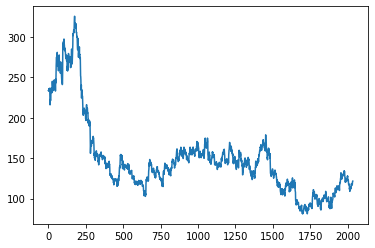

In [ ]:
plt.plot(close_data)

MinMaxScaler must be applied to transform our values between 0 and 1 since LSTM is ssensitive to the scale.

## **Normalization of Data**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
close_data = scaler.fit_transform(np.array(close_data).reshape(-1,1))
close_data.shape

(2035, 1)

In [ ]:
print(close_data)

[[0.62418301]
 [0.62214052]
 [0.62622549]
 ...
 [0.1621732 ]
 [0.16319444]
 [0.16584967]]


## **Splitting the Dataset into Train and Test Sets**

In [ ]:
train_size = int(len(close_data)*0.75)
test_size = len(close_data) - train_size
train_data,test_data = close_data[0:train_size,:],close_data[train_size:len(close_data),:1]

In [ ]:
def create_dataset(dataset,time_step = 1):
    dataX,dataY = [],[]
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX), np.array(dataY) 

In [ ]:
time_step = 100
x_train, y_train = create_dataset(train_data,time_step)
x_test, y_test = create_dataset(test_data,time_step)

## **Reshaping the Input**

In [ ]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

## **Creating the LSTM Model**

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
23/23 [==============================] - 12s 263ms/step - loss: 0.0211 - val_loss: 0.0076
Epoch 2/100
23/23 [==============================] - 5s 202ms/step - loss: 0.0025 - val_loss: 7.7175e-04
Epoch 3/100
23/23 [==============================] - 5s 198ms/step - loss: 0.0017 - val_loss: 0.0016
Epoch 4/100
23/23 [==============================] - 5s 201ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 5/100
23/23 [==============================] - 5s 199ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 6/100
23/23 [==============================] - 5s 199ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 7/100
23/23 [==============================] - 5s 199ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 8/100
23/23 [==============================] - 5s 199ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 9/100
23/23 [==============================] - 5s 201ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 10/100
23/23 [==============================] - 5s 200ms/step - loss: 0.0011 - v

## **Predicting and Testing Performance Metrics**

In [ ]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

## **Transforming back into original form**

In [ ]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

## **Calculating RMSE Performance metrics**

In [ ]:
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

165.87076791352783

In [ ]:
math.sqrt(mean_squared_error(y_test, test_predict))

107.81624065901732

## **Plotting**

### **1.Shift train prediction**

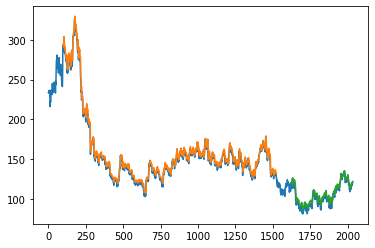

In [ ]:
look_back = 100
trainPredictPlot = np.empty_like(close_data)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict
testPredictPlot = np.empty_like(close_data)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) + (look_back*2)+1:len(close_data)-1 ,:] = test_predict
plt.plot(scaler.inverse_transform(close_data))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

## **Predicting the Stock Price of the next 30 days**

In [ ]:
len(test_data),x_test.shape

(509, (408, 100, 1))

In [ ]:
x_input = test_data[409:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [ ]:
list_out = []
n_steps = 100
days = 30
i = 0
while(i<days):
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input=x_input.reshape((1,n_steps,1))
        yhat = model.predict(x_input,verbose=0)
        print("{} day input {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        list_out.extend(yhat.tolist())
        i=i+1
    else:
        x_input=x_input.reshape((1,n_steps,1))
        yhat = model.predict(x_input,verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        list_out.extend(yhat.tolist())
        i=i+1

[0.17401502]
1 day input [0.13848039 0.14011438 0.13888889 0.13541667 0.14011438 0.1380719
 0.13071895 0.13071895 0.12867647 0.11846405 0.14644608 0.14808007
 0.15910948 0.15992647 0.15788399 0.16441993 0.17892157 0.17933007
 0.19260621 0.20812908 0.18974673 0.18055556 0.18239379 0.17708333
 0.17810458 0.18055556 0.17810458 0.17851307 0.19607843 0.18913399
 0.18954248 0.19403595 0.19444444 0.20200163 0.19771242 0.19934641
 0.19873366 0.1997549  0.2128268  0.21568627 0.20445261 0.21772876
 0.21098856 0.21425654 0.19750817 0.18811275 0.17851307 0.17381536
 0.16033497 0.16564542 0.17116013 0.17422386 0.18035131 0.17401961
 0.16278595 0.16973039 0.17810458 0.17034314 0.16830065 0.17279412
 0.17544935 0.18382353 0.19138072 0.18913399 0.19097222 0.17238562
 0.16830065 0.1693219  0.17177288 0.16156046 0.14971405 0.1503268
 0.15196078 0.14726307 0.14501634 0.14603758 0.12479575 0.13112745
 0.11397059 0.1190768  0.12377451 0.13562092 0.12908497 0.13459967
 0.12806373 0.13031046 0.12724673 0.135

In [ ]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)
df3 = close_data.tolist()
df3.extend(list_out)
len(close_data)

2035

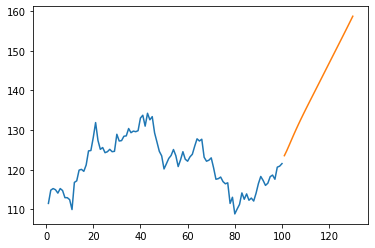

In [ ]:
plt.plot(day_new,scaler.inverse_transform(close_data[1935:]))
plt.plot(day_pred,scaler.inverse_transform(list_out))